In [2]:
import numpy as np
import scipy.signal as sig
import scipy.fft as fft
import matplotlib.pyplot as plt

In [3]:
def plt_fft(u):
    ufft = fft.fftshift(fft.fft(u))
    ufft_abs =  ufft.real**2 + ufft.imag**2
    plt.plot(fft.fftshift(fft.fftfreq(len(u))), ufft_abs)

We create a sine signal with a defined frequency $\theta$ and plot the signal and its spectrum.

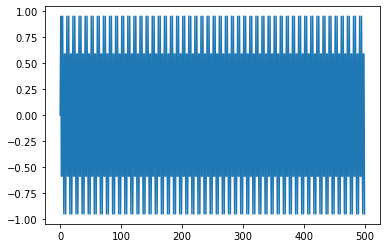

In [25]:
N = 500

theta = 0.3
t = np.arange(N)
u = np.sin(2 * np.pi * theta * t)
# u = sig.lfilter(taps, [1], u)
plt.plot(t,u)

We have chosen our signal definition, spectrum calculation so that the $\theta$ value above matches the spectrum plot; i.e. there is a peak in the spectrum at $\pm \theta$.

The spectrum is periodic with period $1$ - so there are additional ines at $1 \pm \theta, -1 \pm \theta$ etc...

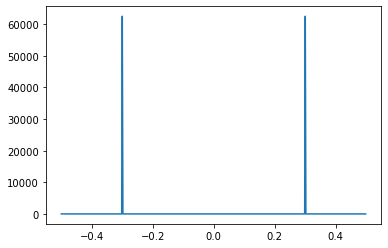

In [26]:
plt_fft(u)

Now we upsample the signal. The spectrum gets compressed by a factor $2$.This means that the peaks located around the periodic copies are getting further to zero:

The copy centered at $1$ is compressed to $1/2 \pm \theta / 2$, the one centered at $-1$ is spread to $-1/2 \pm \theta / 2$ and so on.

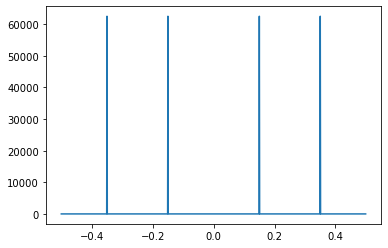

In [27]:
v = np.zeros(2*N)
v[::2] = np.copy(u) # CAREFUL, we need to take a copy here; otherwise this is just a reference!
plt_fft(v)

<StemContainer object of 3 artists>

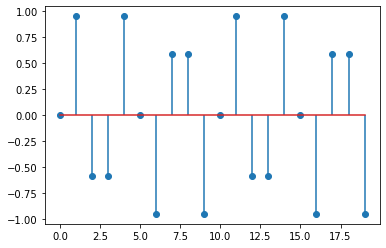

In [28]:
plt.stem(u[0:20])

<StemContainer object of 3 artists>

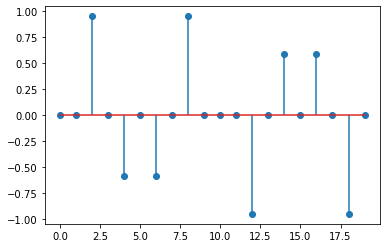

In [29]:
plt.stem(v[0:20])

In [9]:
cutoff = 0.25    # Desired cutoff frequency
trans_width = 0.05  # Width of transition from pass band to stop band
numtaps = 50      # Size of the FIR filter.

taps = sig.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5], [1, 0], fs=1.0)

In [14]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w/2/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-60, 5)
    ax.set_xlim(0, 0.5)
    ax.grid(True)
    ax.set_xlabel('Normalized Frequency')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

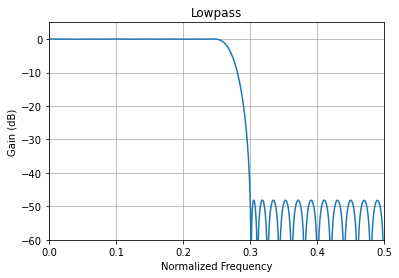

In [17]:
w, h = sig.freqz(taps, [1], worN=2000)
plot_response(w, h, "Lowpass")

<StemContainer object of 3 artists>

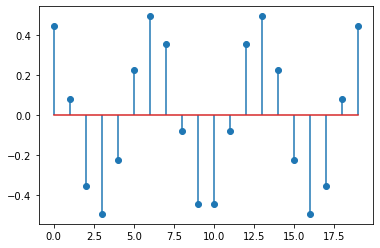

In [30]:
ufiltered = sig.lfilter(taps, [1], v)
plt.stem(ufiltered[100:120])

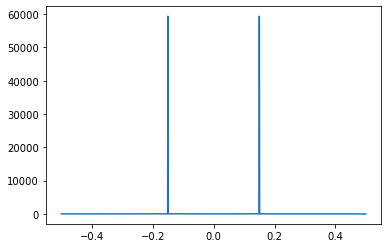

In [31]:
plt_fft(ufiltered)